In [1]:
# import necessary libraries
import numpy as np
import pandas as pd

In [2]:
# import dataset
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
# show few top rows of data
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# shape of data
df.shape

(10000, 14)

In [5]:
# summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# find duplicate in data
df.duplicated().sum()

np.int64(0)

In [7]:
# find count of exited customers
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
# find countries in dataset 
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
# gender counts
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [10]:
# drop unnecessary columns
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [11]:
# new dataset
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
# one hot encoding on geography and gender
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True).astype(int)

In [13]:
# get value of X and y
X = df.drop(columns=['Exited'])
y = df['Exited']

In [14]:
# import train test split to train the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
# X training shape
X_train.shape

(8000, 11)

In [16]:
# import StandardScaler
# Scaling training dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [17]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]], shape=(8000, 11))

In [19]:
# import tensorflow and necessary library
! pip install tensorflow
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.0/645.0 MB 21.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 39.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 38.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 39.7 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 41.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python3 -m pip install --upgrade pip


2025-06-03 07:58:41.695770: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-03 07:58:41.794999: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-03 07:58:41.852197: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748937521.914062    5386 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748937521.930402    5386 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1748937522.049671    5386 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [20]:
# create model instance 
model = Sequential()

# add input, hidden, output layers to model
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/python/3.12.1/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-06-03 07:58:45.619846: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [21]:
# summary of model--> trainable parameters and layers
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# compile our model
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [23]:
# run your model for epoch 100
history = model.fit(x_train_scaled,y_train,epochs=100, validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5365 - loss: 0.7195 - val_accuracy: 0.7975 - val_loss: 0.5034
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8006 - loss: 0.4810 - val_accuracy: 0.8025 - val_loss: 0.4470
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8034 - loss: 0.4449 - val_accuracy: 0.8119 - val_loss: 0.4276
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8142 - loss: 0.4311 - val_accuracy: 0.8163 - val_loss: 0.4126
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8330 - loss: 0.4050 - val_accuracy: 0.8256 - val_loss: 0.3965
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8357 - loss: 0.4098 - val_accuracy: 0.8344 - val_loss: 0.3829
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8492 - loss: 0.3784 - val_accuracy: 0.8381 - val_loss: 0.3724
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8476 - loss: 0.3716 - val_accu

In [24]:
# input layer's weight
model.layers[0].get_weights()

[array([[-2.33968168e-01,  2.11372059e-02,  6.81763738e-02,
         -1.48486635e-02, -1.14693031e-01,  2.58184910e-01,
          6.69835508e-02, -2.50501186e-02, -1.53598800e-01,
          1.41198009e-01, -2.12679803e-01],
        [ 8.08341146e-01, -7.27175996e-02,  2.77762208e-02,
         -1.13158263e-01,  2.14992553e-01, -7.86470234e-01,
          9.40322101e-01,  1.26962101e+00,  1.40165716e-01,
         -7.00487196e-01,  3.98510814e-01],
        [-2.28885338e-01, -3.50671798e-01, -3.41571957e-01,
          1.85829550e-01, -1.10022932e-01, -6.16599262e-01,
          1.22906296e-02,  1.35917217e-01,  4.95552868e-01,
         -1.31127045e-01, -3.89092058e-01],
        [-1.83643803e-01,  1.35755837e-01,  3.40503633e-01,
         -4.07368392e-01,  5.71347952e-01,  3.37883592e-01,
          2.84144767e-02, -1.42154053e-01, -1.44570693e-01,
          7.23181590e-02,  6.14741677e-03],
        [-3.64883721e-01, -1.22784650e+00,  4.19370562e-01,
         -1.24630547e+00,  1.11491585e+00, -

In [25]:
# hidden layer weights
model.layers[1].get_weights()

[array([[-0.27383906,  0.5170811 , -0.53144205, -0.21732986,  0.24636601,
          0.5219856 , -0.02616751, -0.21408658,  0.49916425,  0.08277032,
         -1.1726295 ],
        [ 0.60105366, -0.58499384, -0.70046943, -0.33825132,  0.61552304,
          0.05794337, -0.17682877,  0.25122973, -0.2778168 ,  0.3801377 ,
          0.01213638],
        [-0.23267236,  0.48848292, -0.06791931, -0.00201997,  0.45822814,
         -0.03976362,  0.2768234 , -0.17727974, -0.20890191,  0.4684524 ,
          0.10418628],
        [ 0.43174946, -0.58293223,  0.04958626, -0.07270389,  0.6594884 ,
         -0.29073358, -0.0640696 , -0.50624496, -0.10784069,  0.84054077,
         -0.1290805 ],
        [-0.45694786, -0.40731362, -0.4672456 ,  0.05512248,  0.24214573,
         -0.18492639,  0.03050399, -0.12106002, -0.21958147,  0.43291447,
          0.9641776 ],
        [-0.3748792 ,  0.13147181,  0.19429858, -0.09435007, -0.26210326,
          0.32847795,  0.49620533, -0.48871127,  0.17287658, -0.2143909

In [26]:
model.layers[2].get_weights()

[array([[-1.1231679 ],
        [-0.737663  ],
        [ 0.2168621 ],
        [-1.1133689 ],
        [ 0.68436027],
        [-0.47420517],
        [-0.27905372],
        [-0.3093919 ],
        [-0.6864597 ],
        [ 0.8252116 ],
        [ 1.5392964 ]], dtype=float32),
 array([-0.13445418], dtype=float32)]

In [27]:
# predict test model
y_log = model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [28]:
# decide threshold to get y_pred in binary form
y_pred = np.where(y_log>0.5,1,0)

In [29]:
# calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.861

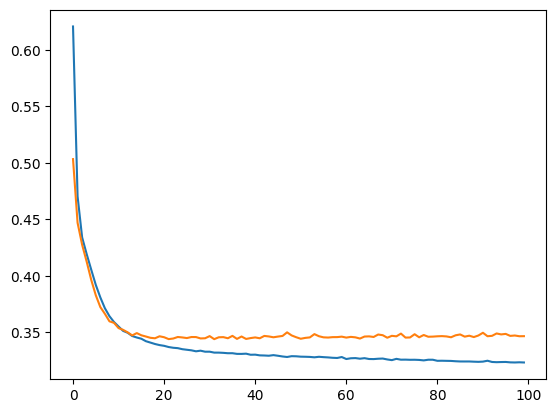

In [30]:
# plot graphs for history to compare 
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

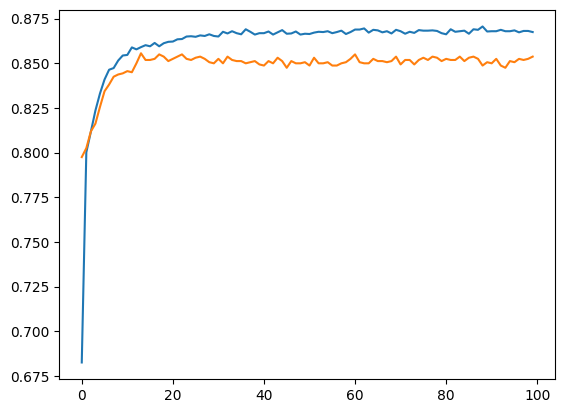

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])